<a href="https://colab.research.google.com/github/1mah1/DT2/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import regularizers

In [2]:
input_dir = "/content/drive/MyDrive/Python/garbage_classification"
categories = ['cardboard', 'green-glass', 'metal']
image_size = 224

In [3]:
# data = []
# labels = []
# for category_indx, category in enumerate(categories):
#     file_count = 0
#     for file in os.listdir(os.path.join(input_dir, category)):
#         # if file_count >= images_per_category:
#         #     break
#         img_path = os.path.join(input_dir, category, file)
#         img = imread(img_path)
#         img = resize(img, (image_size, image_size))
#         # Normalize the image data
#         img = img / 255.0
#         data.append(img)
#         labels.append(category_indx)
#         file_count += 1

# data = np.asarray(data)
# labels = np.asarray(labels)

In [4]:
data = []
labels = []
for category_indx, category in enumerate(categories):
    file_count = 0
    for file in tqdm(os.listdir(os.path.join(input_dir, category))):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (image_size, image_size))
        data.append(img)
        labels.append(category_indx)
        file_count += 1

data = np.asarray(data) / 255.0
labels = np.asarray(labels)




100%|██████████| 769/769 [00:38<00:00, 20.14it/s]


In [5]:
# data = []
# labels = []

# for i in categories:
#     folderPath = os.path.join(train_set, i)
#     for j in tqdm(os.listdir(folderPath)):
#         img = cv2.imread(os.path.join(folderPath,j))
#         img = cv2.resize(img,(image_size, image_size))
#         X_train.append(img)
#         y_train.append(i)


# data = np.asarray(data) / 255.0
# labels = np.asarray(labels)


In [6]:
print(f"Total images loaded: {len(data)}")
for category_idx, category in enumerate(categories):
    count = np.sum(labels == category_idx)
    print(f"{category}: {count} images")

Total images loaded: 2289
cardboard: 891 images
green-glass: 629 images
metal: 769 images


In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    data,
    labels,
    test_size=0.2,
    shuffle=True,
    stratify=labels,
    random_state=42
)
print(f"Total samples: {len(data)}")
print(f"Training samples: {len(x_train)} ({len(x_train)/len(data):.1%})")
print(f"Test samples: {len(x_test)} ({len(x_test)/len(data):.1%})")

Total samples: 2289
Training samples: 1831 (80.0%)
Test samples: 458 (20.0%)


In [8]:
# indices = np.arange(len(data))

# # Split indices instead of actual data
# train_idx_temp, test_idx = train_test_split(
#     indices,
#     test_size=0.2,
#     shuffle=True,
#     stratify=labels,
#     random_state=42
# )

# train_idx, val_idx = train_test_split(
#     train_idx_temp,
#     test_size=0.2,
#     shuffle=True,
#     stratify=labels[train_idx_temp],
#     random_state=42
# )
# x_train = data[train_idx]
# y_train = labels[train_idx]
# x_val = data[val_idx]
# y_val = labels[val_idx]
# x_test = data[test_idx]
# y_test = labels[test_idx]

# # Print split sizes
# print(f"Total samples: {len(data)}")
# print(f"Training samples: {len(x_train)} ({len(x_train)/len(data):.1%})")
# print(f"Validation samples: {len(x_val)} ({len(x_val)/len(data):.1%})")
# print(f"Test samples: {len(x_test)} ({len(x_test)/len(data):.1%})")

In [9]:
# y_train_new = []
# for i in y_train:
#     y_train_new.append(labels[i])
# y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


# y_test_new = []
# for i in y_test:
#     y_test_new.append(labels[i])
# y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
# inp = layers.Input((image_size, image_size, 3))
# x = layers.Conv2D(96, 11, 4, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inp)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D(3, 2)(x)

# x = layers.Conv2D(256, 5, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D(3, 2)(x)

# x = layers.Conv2D(384, 3, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.Conv2D(384, 3, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)

# x = layers.Conv2D(256, 3, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.MaxPooling2D(3, 2)(x)
# x = layers.Flatten()(x)
# x = layers.Dense(4096, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(4096, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# # x = layers.Dense(len(labels), activation='')(x)
# x = layers.Dense(len(categories), activation='softmax')(x)

# model = Model(inputs=inp, outputs=x)
# model.summary()

In [11]:
inp = layers.Input((image_size, image_size, 3))

x = layers.Conv2D(64, 11, 4, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inp)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(3, 2)(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, 5, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(3, 2)(x)

x = layers.Conv2D(256, 3, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(256, 3, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D(3, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(len(categories), activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 54, 54, 64)          │          23,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 22, 22, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,106,243 (84.33 MB)

 Trainable params: 22,105,859 (84.33 MB)

 Non-trainable params: 384 (1.50 KB)

In [12]:
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(categories))
# y_val = tf.keras.utils.to_categorical(y_val, num_classes=len(categories))

# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )


# train_generator = tf.keras.preprocessing.image.ImageDataGenerator().flow(x_train, y_train, batch_size=16)
# val_generator = tf.keras.preprocessing.image.ImageDataGenerator().flow(x_val, y_val, batch_size=16)

model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])



reduce_lr = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    # factor = 0.3,
    # factor = 0.4,
    factor=0.6,
    # patience = 2,
    patience = 3,
    min_delta = 0.001,
    mode='auto',
    verbose=1)



history = model.fit(
    x_train,
    y_train,
    validation_split= 0.2,
    epochs = 40,
    verbose=1,
    batch_size=32,
    callbacks=[reduce_lr])



train_loss = history.history['loss']
val_loss = history.history['val_loss']

# filename = os.path.join(self.mother_folder, 'results', 'train_loss.npy')
# np.save(filename, train_loss_combined)
# filename = os.path.join(self.mother_folder, 'results', 'saved_model', 'model1.h5')
filename = os.path.join('/content/drive/MyDrive/Python/garbage_classification', 'results3', 'saved_model', 'model1.h5')
model.save(filename)


# history = model.fit(
#     x_train,
#     y_train,
#     # batch_size=32,
#     batch_size=16,
#     epochs=50,
#     validation_data=(x_val, y_val),  # This is where validation data is added
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=5,
#             restore_best_weights=True
#         )
#     ]
# )

Epoch 1/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.4955 - loss: 31.3286 - val_accuracy: 0.3433 - val_loss: 3.1084 - learning_rate: 0.0010
Epoch 2/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8337 - loss: 1.9507 - val_accuracy: 0.3433 - val_loss: 1.7552 - learning_rate: 0.0010
Epoch 3/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8691 - loss: 0.9618 - val_accuracy: 0.3433 - val_loss: 1.5083 - learning_rate: 0.0010
Epoch 4/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8836 - loss: 0.6900
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
46/46 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8834 - loss: 0.6900 - val_accuracy: 0.3433 - val_loss: 1.4060 - learning_rate: 0.0010
Epoch 5/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8920 - loss: 0.5541 - val_accuracy: 0.3433 - val_loss: 1.4486 - learning_rate: 6.0000e-04
Epoch 6/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8742 - loss: 0.5516 - val_acc

In [1]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

plt.figure(figsize=(8, 6))

cm = confusion_matrix(y_test_classes, y_pred_classes)

# conf_matrix_percent = (conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100).round(1)
conf_matrix_percent = (cm / cm.sum(axis=1)[:, np.newaxis] * 100).round(1)

# print("Confusion Matrix (%):")
# print(conf_matrix_percent)

# print("\nTraining History:")
# print(history.history)


# plt.figure(figsize=(8, 6))
# cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=categories,
            yticklabels=categories)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

NameError: name 'model' is not defined

In [19]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.2%}")

from sklearn.metrics import classification_report, f1_score

report = classification_report(y_test_classes, y_pred_classes, digits=2)
print("Classification Report:\n", report)

f1_macro = f1_score(y_test_classes, y_pred_classes, average='macro')
f1_weighted = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"F1 Score (Macro): {f1_macro:.2f}")
print(f"F1 Score (Weighted): {f1_weighted:.2f}")


Test Accuracy: 91.05%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       178
           1       0.95      0.96      0.96       126
           2       0.86      0.91      0.88       154

    accuracy                           0.91       458
   macro avg       0.91      0.92      0.91       458
weighted avg       0.91      0.91      0.91       458

F1 Score (Macro): 0.91
F1 Score (Weighted): 0.91


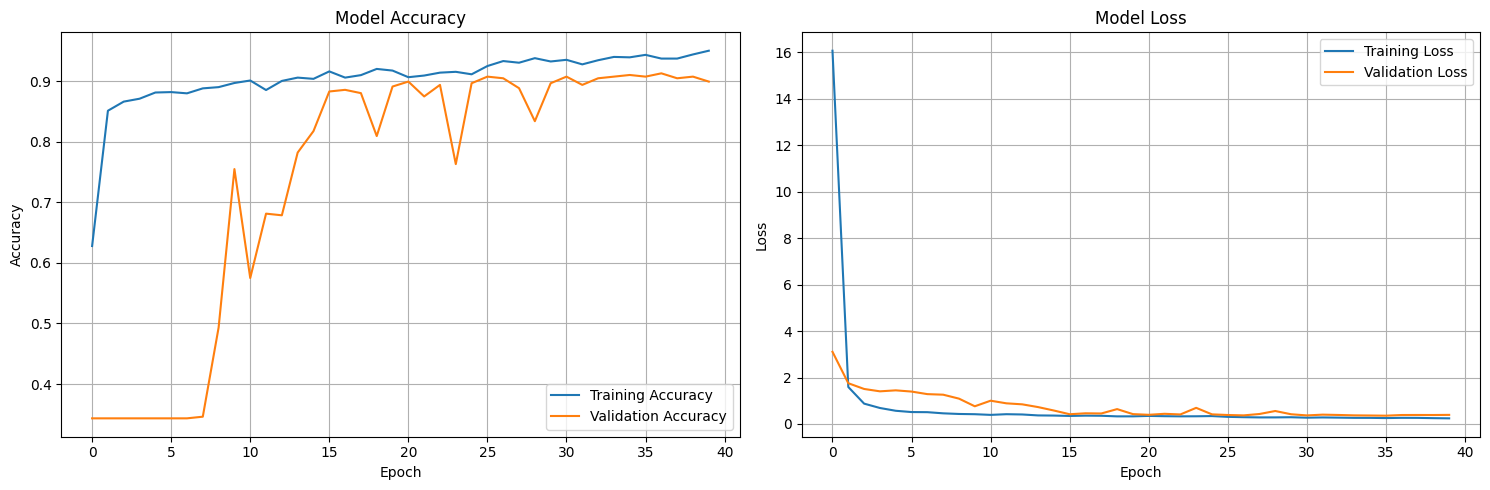

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')
ax1.grid(True)

ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.grid(True)

plt.tight_layout()
plt.show()

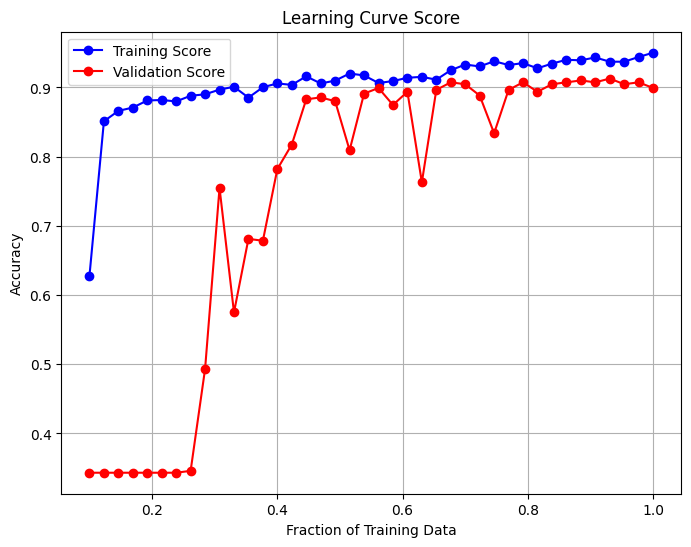

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(history):
    train_sizes = np.linspace(0.1, 1.0, len(history.history["accuracy"]))  # Scale training sizes
    train_scores = history.history["accuracy"]
    val_scores = history.history["val_accuracy"]

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores, 'o-', label="Training Score", color="blue")
    plt.plot(train_sizes, val_scores, 'o-', label="Validation Score", color="red")
    plt.xlabel("Fraction of Training Data")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve Score")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(history)


In [16]:
# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# cm = confusion_matrix(y_val_fold, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
#             xticklabels=categories,
#             yticklabels=categories)
# plt.title('Confusion Matrix')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

In [17]:
# # First split: separate test set (20% of data)
# x_train_temp, x_test, y_train_temp, y_test = train_test_split(
#     data,
#     labels,
#     test_size=0.2,
#     shuffle=True,
#     stratify=labels,
#     random_state=42
# )

# # Second split: divide remaining data into train and validation (20% of remaining data = 16% of original data)
# x_train, x_val, y_train, y_val = train_test_split(
#     x_train_temp,
#     y_train_temp,
#     test_size=0.2,
#     shuffle=True,
#     stratify=y_train_temp,
#     random_state=42
# )

# print('hi')
# # Print split sizes
# print(f"Total samples: {len(data)}")
# print(f"Training samples: {len(x_train)} ({len(x_train)/len(data):.1%})")
# print(f"Validation samples: {len(x_val)} ({len(x_val)/len(data):.1%})")
# print(f"Test samples: {len(x_test)} ({len(x_test)/len(data):.1%})")